In [1]:
from utils import *

In [314]:
task, name, day = "Tmaze_halfSwitch", "A2", "d9"

In [315]:
dfs = load_dfs(task, name, day)
dfs = dfs[dfs.speed > 5]
#gaussian smoothing rundir
dfs['rundir'] = gaussian_filter1d(dfs.rundir.reset_index(drop=True), sigma=5)
#add new variables, runbin
rmax = dfs['rundir'].max()
rmin = dfs['rundir'].min()
dfs['dirbin'] = dfs['rundir'] // ((rmax - rmin) / 20)

### cell activities might be modulated by rundir

In [217]:
#ax1: odd_even consistency of "rundir" map (cell activity as a function of rundir)
#ax2: spatial map (L choice) of each trial
#ax3: spatial map (R choice) of each trial

odd = dfs[dfs.trial.isin(dfs.trial.unique()[::2])]
even = dfs[dfs.trial.isin(dfs.trial.unique()[1::2])]
cellsodd = odd.groupby('runbin').mean().loc[:,'cell0':]
cellseven = even.groupby('runbin').mean().loc[:,'cell0':]
@interact(n=(0,1000))
def plot(n=0):
    fig, ax = plt.subplots(3,1,figsize=(20,6))
    ax[0].plot(cellsodd.iloc[:,n])
    ax[0].plot(cellseven.iloc[:,n])   
    ax[1].imshow(dfs[dfs.choice=='L'].pivot_table(values=f'cell{n}',columns='bin',index='trial'))
    ax[2].imshow(dfs[dfs.choice=='R'].pivot_table(values=f'cell{n}',columns='bin',index='trial'))    
    plt.show()

### cell activities might correlates with rundir

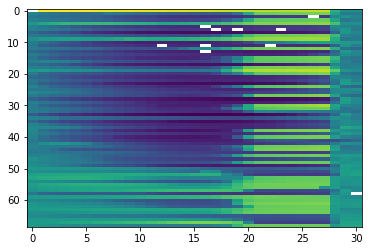

In [319]:
plt.imshow(dfs.pivot_table(values='rundir',columns='bin',index='trial'), aspect='auto')

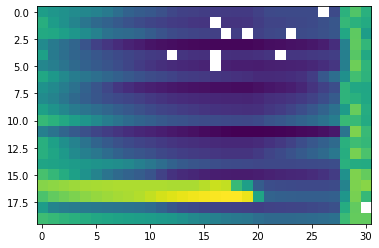

In [322]:
cond = "type=='AA'"
dfs2 = dfs.query(cond)
plt.imshow(dfs2.pivot_table(values='rundir',columns='bin',index='trial'), aspect='auto')

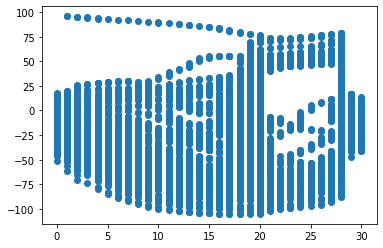

In [316]:
plt.scatter(dfs.bin,dfs.rundir)

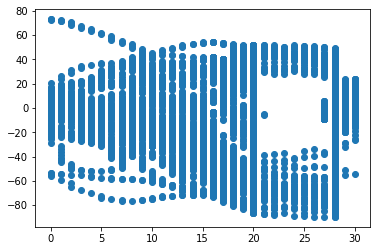

In [313]:
plt.scatter(dfs.bin,dfs.rundir)

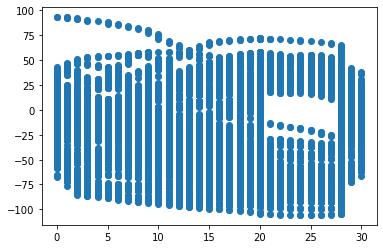

In [309]:
plt.scatter(dfs.bin,dfs.rundir)

In [292]:
# rundir map of each trial
@interact(n=(0,1000))
def plot(n=0):
    fig, ax = plt.subplots(1,5,figsize=(20,6))
    ax[0].imshow(dfs.pivot_table(values=f'cell{n}',columns='dirbin',index='trial'), aspect='auto')     
    ax[1].imshow(dfs.pivot_table(values=f'cell{n}',columns='bin',index='trial'), aspect='auto')
    ax[2].imshow(dfs[dfs.choice=='L'].pivot_table(values=f'cell{n}',columns='bin',index='trial'), aspect='auto')
    ax[3].imshow(dfs[dfs.choice=='R'].pivot_table(values=f'cell{n}',columns='bin',index='trial'), aspect='auto')    
    ax[4].plot(dfs.groupby('dirbin').mean()[f'cell{n}'])
    plt.show()

interactive(children=(IntSlider(value=0, description='n', max=1000), Output()), _dom_classes=('widget-interact…

In [2]:
NAME = 'A1'
TASKS = ['Tmaze_random', 'Tmaze_halfSwitch']
general_cond = 'speed>2'
conds = ["type=='AA'", "type=='BB'"]
filepath = Path(pc)/'cellreg'/NAME/'rundir_cells'
filepath.mkdir(parents=True, exist_ok=True)
font_size=18
cells_per_page=3

In [3]:
ptt = pd.read_csv(pt)
props = {}
dfss = {}

for task,name,day,*_ in ptt[ptt.ForUse&ptt.CellReg&ptt.Task.isin(['Tmaze_random', 'Tmaze_halfSwitch'])&(ptt.Name==NAME)].values:
    props[(task,day)] = load_pc_prop(task,name,day,general_cond.replace(">","morethan").replace("<","lessthan"))
    dfs = ca_events(load_dfs(task,name,day)).query(general_cond)
    #gaussian smoothing rundir
    dfs['rundir'] = gaussian_filter1d(dfs.rundir.reset_index(drop=True), sigma=5)
    #add new variables, runbin
    rmax = dfs['rundir'].max()
    rmin = dfs['rundir'].min()
    dfs['dirbin'] = dfs['rundir'] // ((rmax - rmin) / 20)
    dfss[(task,day)] = dfs

maxid = int(pd.concat([d.id for d in props.values()]).max())    

for i in np.arange(0,maxid,cells_per_page):
    fig, ax = plt.subplots(len(props), len(conds)*cells_per_page, figsize=(10*cells_per_page,2*len(props)))
    for a, cond in zip(ax[0], conds*cells_per_page):
        a.set_title(cond, fontsize=font_size)
    for a, (task,day) in zip(ax[:,0], list(props.keys())):
        a.set_ylabel(f"{day}",size='large', fontsize=font_size)
    for l in range(cells_per_page):
        for j in range(len(ax)):
            task, day = list(props.keys())[j]
            prop = props[(task,day)]
            row = prop[prop.id==i+l]
            if row.shape[0] > 0:
                n = row.index[0]
                dfs = dfss[(task,day)]
                for k,cond in enumerate(conds):
                    ax[j,k+l*len(conds)].imshow(dfs.query(cond).pivot_table(values=f'cell{n}',columns='dirbin',index='trial'), aspect='auto',interpolation='None')
                    if row[cond].iloc[0] >= 0:
                        ax[j,k+l*len(conds)].axvline(row[cond].iloc[0], alpha=0.5,color='red',linewidth=4)        
    plt.savefig(Path(filepath)/f'{i}-{i+cells_per_page-1}.png')
    plt.close()

### cell activities would not correlate with speed

In [226]:
# speed map of each trial
dfs['speed'] = gaussian_filter1d(dfs.speed.reset_index(drop=True), sigma=5)
dfs['speedbin'] = pd.cut(dfs.sort_values(by='speed').speed, bins=20)
@interact(n=(0,1000))
def plot(n=0):
    plt.figure(figsize=(20,6))
    plt.imshow(dfs.pivot_table(values=f'cell{n}',columns='speedbin',index='trial'), aspect='auto')  
    plt.show()

interactive(children=(IntSlider(value=0, description='n', max=1000), Output()), _dom_classes=('widget-interact…